## Matplotlib Homework

#### Author: Joey Picca

## Observations and Insights

- As I state below, our summary statistics show two clear leaders for drug regimens (Capomulin and Ramicane), which have mean tumor volumes 10-15 mm3 smaller than the other regimens. In choosing our next two most promising drugs, the data become foggier. Given how close the means of Infubinol, Ceftamin, Propriva, and Zoniferol are, justifications can be made for each of them. Still, after plotting the standard errors (for my own clarification), I thought Propriva and Ceftamin should round out the Top 4. So I'll disagree with the readme on that detail! (although I still used the readme's ask for outlier calculation, etc.)
- It makes sense that Capomulin and Ramicane have smaller standard errors, given that their sample sizes are larger than all the other drugs. 
- There don't appear to be many outliers for our analyzed drugs (just the one outlier detected for Infubinol). This suggests that if we were to try to develop some sort of model to predict final tumor volume for our drug regimens, we might not need to be particularly concerned about the influence of outliers. 
- There seems to be a pretty strong correlation between mouse weight and mean tumor volume, as evidenced by our correlation coefficient (~0.84) and the scatterplot. Therefore, if we were trying to predict tumor volume for a certain mouse, that mouse's weight seems like an important feature to maintain. 

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combinedData = mouse_metadata.merge(study_results,on='Mouse ID')

## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# We groupby drug regimen and then call 'agg' to apply a list of aggregator functions on the Tumor Volume column
summaryStats = combinedData.groupby(['Drug Regimen']).agg(['mean','median','var','std','sem'])['Tumor Volume (mm3)']
summaryStats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

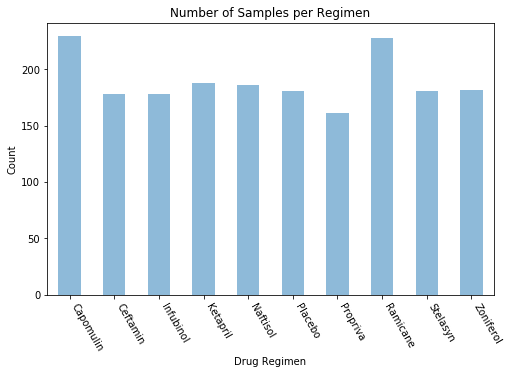

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

# To do this, I created a new dataframe that places the drug names (via keys) in one column
# and the count values (via values) in another column

barDF = pd.DataFrame({'Drug Regimen': combinedData.groupby('Drug Regimen')['Tumor Volume (mm3)'].count().keys(),
                     'Count': combinedData.groupby('Drug Regimen')['Tumor Volume (mm3)'].count().values});

barDF.plot.bar(x='Drug Regimen',y='Count',figsize=(8,5),legend=False,alpha=0.5)
plt.xlabel('Drug Regimen')
plt.ylabel('Count')
plt.xticks(rotation=-60,ha='left')
plt.title('Number of Samples per Regimen')
plt.show()

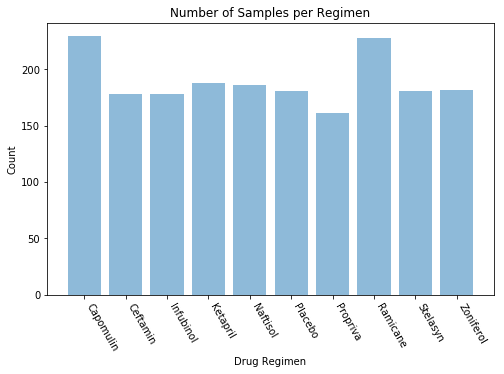

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# For this ask, I used the prior dataframe, but then utilized matplotlib instead of pandas

plt.figure(figsize=(8,5))
plt.bar(np.arange(len(barDF['Drug Regimen'])),barDF['Count'],alpha=0.5)
plt.xticks(np.arange(len(barDF['Drug Regimen'])),barDF['Drug Regimen'].values,rotation=-60,ha='left')
plt.xlabel('Drug Regimen')
plt.ylabel('Count')
plt.title('Number of Samples per Regimen')
plt.show()

## Pie plots

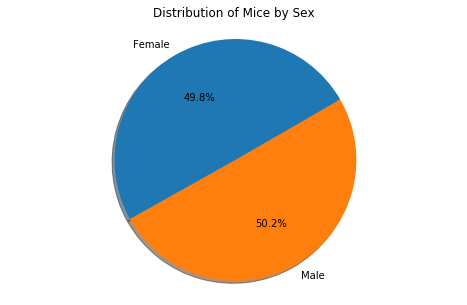

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Create a dataframe holding the count of unique Mouse IDs by Gender
# Tried a slightly different method versus the bar charts, though, by setting the keys as the index

genderCount = pd.DataFrame({'Count':mouse_metadata.groupby('Sex')['Mouse ID'].count().values},
                          index=mouse_metadata.groupby('Sex')['Mouse ID'].count().keys())

# Use that dataframe to produce the pie plot
genderCount.plot.pie(y='Count',figsize=(8, 5),autopct="%1.1f%%",legend=False,startangle=30,shadow=True)
plt.axis("equal")
plt.title("Distribution of Mice by Sex")
plt.ylabel("")
plt.show()

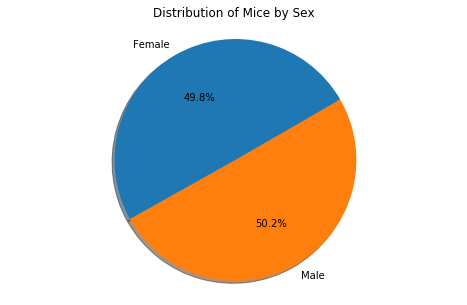

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Since we're using pyplot, I created a variable to hold the list of keys ('Male','Female')
labels = mouse_metadata.groupby('Sex')['Mouse ID'].count().keys()

plt.figure(figsize=(8,5))
plt.pie(genderCount['Count'],autopct="%1.1f%%",startangle=30,shadow=True,labels=labels)
plt.axis("equal")
plt.title("Distribution of Mice by Sex")
plt.show()

## Quartiles, outliers and boxplots

Based on our summary statistics, the means of two drugs (Capomulin and Ramicane) appear significantly lower than those of the other drugs. So we will include these two, at least. To decide which other two drugs to include, I made a plot of the means and error bars (using the standard error of the mean). I also limited the y-axis to just focus on these drugs and make the error bars a little clearer.

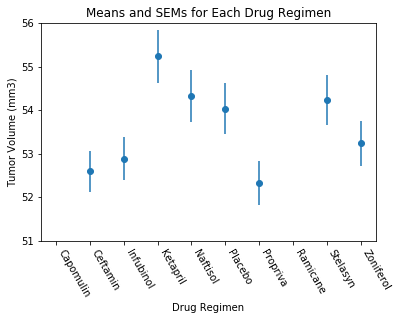

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

# Set up the x-axis and grab the mean and stderror values
x_axis = np.arange(0,len(summaryStats.index),1) + 1
means = summaryStats['mean'].values
se = summaryStats['sem'].values

# Create the figure and axis objects
fig,ax = plt.subplots()

# Add the means/error bars and format the plot
ax.errorbar(x_axis, means, se, fmt="o")
ax.set_ylim(51,56)
plt.xticks(np.arange(len(barDF['Drug Regimen'])) + 1,barDF['Drug Regimen'].values,rotation=-60,ha='left')
plt.title('Means and SEMs for Each Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.show()

Based on the above plot, I would say the next two most promising drugs are Propriva and Ceftamin, although arguments could also be made for Infubinol and even Zoniferol. With that said, the readme.md file states that we should use Capomulin, Ramicane, Infubinol, and Ceftamin. Editorial: Based on the samples provided, it looks slightly more likely that Propriva regimens result in a smaller tumor volume, on average, than Ceftamin and Infubinol do. *shrug emoji*

Four drugs for further investigation:
- Capomulin
- Ramicane
- Infubinol
- Ceftamin

In [8]:
# Grab only our Top 4 candidates at the last timestep of each mouse by using the tail method on our groupby object

mostPromising = combinedData[(combinedData['Drug Regimen'] == 'Capomulin') |
                             (combinedData['Drug Regimen'] == 'Ceftamin') |
                             (combinedData['Drug Regimen'] == 'Infubinol') |
                             (combinedData['Drug Regimen'] == 'Ramicane')].groupby('Mouse ID').tail(1)


In [9]:
# Create a dictionary that we'll use to store regimen-specific dataframes (constructed in the loop below)
# that we can then use to make our boxplots in the next ask

regimen_dict = {}

# Loop through each of the regimens and print our quantitative statistics
for regimen in ['Capomulin','Ceftamin','Infubinol','Ramicane']:
    
    # Make a dataframe for the specific regiment and add it to the dictionary
    df = mostPromising[mostPromising['Drug Regimen'] == regimen]
    regimen_dict[regimen] = df
    
    # Calculate quartiles and IQR
    quartiles = df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    # Print the initial stats
    print(f"For the drug regimen {regimen}...")
    print(f"The lower quartile of final tumor volume is: {lowerq}")
    print(f"The upper quartile of final tumor volume is: {upperq}")
    print(f"The interquartile range of final tumor volume is: {iqr}")
    print(f"The the median of final tumor volume is: {quartiles[0.5]} ")

    # For outlier detection, create our upper and lower bounds using our IQR calculation
    # Then print our thresholds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print('')
    print('****** Outlier Analysis ******')
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

    # Filter the dataframe to see if there are any outliers
    outlier_volume = df.loc[(df['Tumor Volume (mm3)'] < lower_bound) | (df['Tumor Volume (mm3)'] > upper_bound)]
    
    # Print a statement about our findings
    if outlier_volume.index.empty:
        print("There are no likely outliers.")
    else: 
        print("Potential outliers detected: ")
        print(outlier_volume)
        
    print('')
    print('-------------------------------')
    print('')

For the drug regimen Capomulin...
The lower quartile of final tumor volume is: 32.37735684
The upper quartile of final tumor volume is: 40.1592203
The interquartile range of final tumor volume is: 7.781863460000004
The the median of final tumor volume is: 38.125164399999996 

****** Outlier Analysis ******
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
There are no likely outliers.

-------------------------------

For the drug regimen Ceftamin...
The lower quartile of final tumor volume is: 48.72207785
The upper quartile of final tumor volume is: 64.29983003
The interquartile range of final tumor volume is: 15.577752179999997
The the median of final tumor volume is: 59.85195552 

****** Outlier Analysis ******
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
There are no likely outliers.

-------------------------------

For the drug regimen Infubinol...
The lower quartile of final tumor

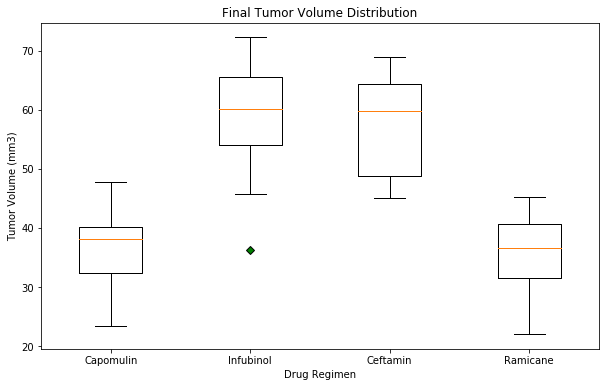

In [10]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Create a list of series (representing the final tumor volume of each mouse, grouped by drug) by
# accessing our previously created dictionary

data = [regimen_dict['Capomulin']['Tumor Volume (mm3)'],regimen_dict['Infubinol']['Tumor Volume (mm3)'],
        regimen_dict['Ceftamin']['Tumor Volume (mm3)'],regimen_dict['Ramicane']['Tumor Volume (mm3)']]

# Format our boxplot
# To satisfy the ask, I created a dictionary (green_diamond) to hold formatting instructions for the outlier

green_diamond = dict(markerfacecolor='g', marker='D')
fig, ax = plt.subplots(figsize=(10,6))
ax.set_title('Final Tumor Volume Distribution')
ax.boxplot(data,flierprops=green_diamond)
ax.set_xticks(np.arange(len(data)) + 1)
ax.set_xticklabels(['Capomulin','Infubinol','Ceftamin','Ramicane'])
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Volume (mm3)')

plt.show()

## Line and scatter plots

In [11]:
# Get a random mouse ID by sampling one and grabbing the ID with iloc
mouseID = combinedData[combinedData['Drug Regimen'] == 'Capomulin'].sample(1).iloc[0,0]

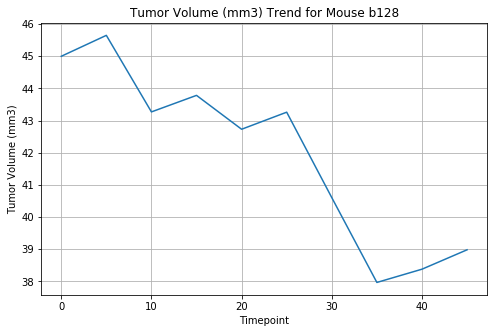

In [12]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Our x is time and our y is volume
x = combinedData[combinedData['Mouse ID'] == mouseID]['Timepoint']
y = combinedData[combinedData['Mouse ID'] == mouseID]['Tumor Volume (mm3)']

# Format the plot
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x,y)
ax.set_title(f'Tumor Volume (mm3) Trend for Mouse {mouseID}')
ax.set_xlabel('Timepoint')
ax.set_ylabel('Tumor Volume (mm3)')
plt.grid(True)

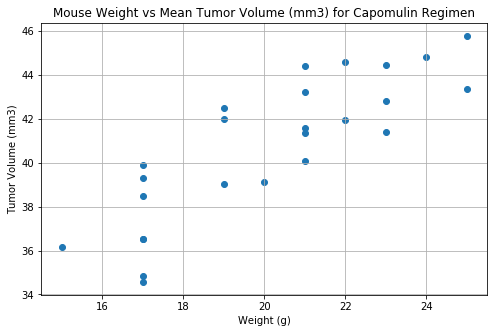

In [13]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Set x equal to the mouse weight and y to the average tumor volume
x = combinedData[combinedData['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID')['Weight (g)'].mean()
y = combinedData[combinedData['Drug Regimen'] == 'Capomulin'].groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Format the plot
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x,y)
ax.set_title(f'Mouse Weight vs Mean Tumor Volume (mm3) for Capomulin Regimen')
ax.set_xlabel('Weight (g)')
ax.set_ylabel('Tumor Volume (mm3)')
plt.grid(True)

The calculated correlation coefficient is 0.8419363424694717


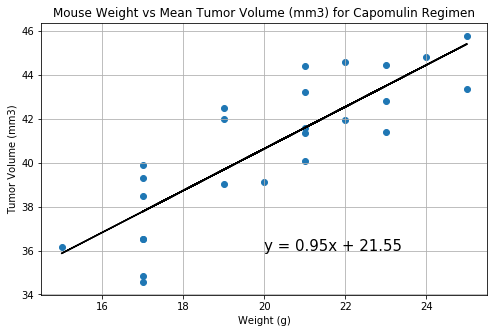

In [14]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

# Feed the previously created x and y to the scipy pearsonr method and print the first value (the correlation coefficient)
print(f'The calculated correlation coefficient is {st.pearsonr(x,y)[0]}')

# Use the linregress function to generate slope, intercept, and other variables (which we don't need for this ask)
# Although, btw, rvalue should equal our previously generated pearsonr function's value
# Then create our regression values (our y's) via our x's and the generated slope and intercept
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept

# Format the plot by using the same axis to plot both the scatterplot and the line plot
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x,y)
ax.set_title(f'Mouse Weight vs Mean Tumor Volume (mm3) for Capomulin Regimen')
ax.set_xlabel('Weight (g)')
ax.set_ylabel('Tumor Volume (mm3)')
plt.grid(True)
ax.plot(x,regress_values,"k-")

# Toss the regression equation on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(20,36),fontsize=15,color="black")
plt.show()